In [1]:
import torch

In [3]:
tensor_from_list = torch.tensor([1, 2, 3])
tensor_from_list

tensor([1, 2, 3])

In [4]:
tensor_zeros = torch.zeros((3, 3))
tensor_zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [5]:
tensor_ones = torch.ones((3,  3))
tensor_ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
tensor_rand = torch.rand((3, 3))
tensor_rand

tensor([[0.9510, 0.0576, 0.5482],
        [0.7920, 0.5869, 0.4054],
        [0.8461, 0.7079, 0.2273]])

In [9]:
tensor_float = torch.rand((3, 3),dtype=torch.float32)
tensor_float

tensor([[0.1017, 0.3190, 0.8920],
        [0.1326, 0.9551, 0.7525],
        [0.6910, 0.5701, 0.8592]])

In [10]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

sum_a_b = a + b
print(sum_a_b)

sub_a_b = a - b
print(sub_a_b)

mul_a_b = a * b
print(mul_a_b)

div_a_b = a / b
print(div_a_b)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])


In [14]:
#transpose
tensor_1 = torch.rand((2, 3))
print(tensor_1)
tensor_1_transpose = tensor_1.t()
print(tensor_1_transpose)

tensor([[0.3524, 0.2649, 0.3183],
        [0.7021, 0.4613, 0.9264]])
tensor([[0.3524, 0.7021],
        [0.2649, 0.4613],
        [0.3183, 0.9264]])


In [16]:
#concatenation
tensor_a = torch.tensor(([1, 2], [3, 4]))
tensor_b = torch.tensor(([5, 6], [7, 8]))


tensor_a_b_rows = torch.cat((tensor_a, tensor_b), dim=0) # rows
tensor_a_b_cols = torch.cat((tensor_a, tensor_b), dim=1) # columns

print(tensor_a_b_rows)
print(tensor_a_b_cols)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


In [18]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
tensor_a_gpu = tensor_a.to(device)
tensor_b_gpu = tensor_b.to(device)

result_on_gpu = tensor_a_gpu + tensor_b_gpu
result_on_cpu = result_on_gpu.to('cpu')
print(result_on_cpu)

tensor([[ 6,  8],
        [10, 12]])


In [20]:
import torch
#y = x^2

x = torch.tensor([2.0], requires_grad=True)
y = x ** 2

#dy/dx
y.backward()
print(x.grad.item())

4.0


In [23]:
# z = x^2 + y^2

x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

z = x**2 + y**2

#dz/dx , dz/dy
z.backward()

print(x.grad.item())
print(y.grad.item())



4.0
6.0


In [24]:
x = torch.tensor([2.0], requires_grad=True)

y = x**3


y.backward(create_graph=True)
print('first_derivative: ', x.grad.item())

x.grad.zero_()

y.backward(retain_graph=True)
print('second_derivative: ', x.grad.item())


first_derivative:  12.0
second_derivative:  12.0


/home/mhmud/.local/lib/python3.10/site-packages/torch/autograd/__init__.py:173: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ../torch/csrc/autograd/engine.cpp:985.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [3]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 5)  # Input layer to hidden layer
        self.relu = nn.ReLU()       # Activation function
        self.fc2 = nn.Linear(5, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the network
model = SimpleNN()

# Print the model architecture
print(model)


SimpleNN(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [5]:
# Sample input data
input_data = torch.tensor([[1.0, 2.0, 3.0]])

# Perform a forward pass
output = model(input_data)
print(output)


tensor([[-0.1442]], grad_fn=<AddmmBackward0>)


In [6]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample target data
target = torch.tensor([[10.0]])

# Training loop
for epoch in range(100):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(input_data)

    # Compute the loss
    loss = criterion(output, target)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 70.6954
Epoch [20/100], Loss: 47.1968
Epoch [30/100], Loss: 31.5090
Epoch [40/100], Loss: 21.0357
Epoch [50/100], Loss: 14.0436
Epoch [60/100], Loss: 9.3756
Epoch [70/100], Loss: 6.2592
Epoch [80/100], Loss: 4.1787
Epoch [90/100], Loss: 2.7897
Epoch [100/100], Loss: 1.8625


In [ ]:
# Define a more complex neural network
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) #(input kernels, ouput kernels, kernel_size, padding)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

# Create an instance of the network
model = ComplexNN()

# Print the model architecture
print(model)


In [7]:
#example 1

# Import the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Define the hyperparameters
batch_size = 64 # The number of samples per batch
num_epochs = 10 # The number of times to iterate over the whole dataset
learning_rate = 0.01 # The learning rate for the optimizer

# Define the transformation to apply to the images
transform = transforms.Compose([
	transforms.ToTensor(), # Convert the images to tensors
	transforms.Normalize((0.1307,), (0.3081,)) # Normalize the pixel values with mean and std
])


In [9]:
# Load the MNIST dataset from the web
train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform) # The training set
test_dataset = datasets.MNIST(root='.', train=False, download=True, transform=transform) # The test set

# Create the data loaders for batching and shuffling the data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # The training loader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # The test loader


Failed to download (trying next):
HTTP Error 403: Forbidden



9913344it [00:39, 248537.21it/s]                                 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



29696it [00:00, 139026.42it/s]                                   


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



1649664it [00:05, 276183.63it/s]                                 


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



5120it [00:00, 11970365.93it/s]                                  

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [10]:
# Define the neural network model
class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		# The network has two fully connected layers
		self.fc1 = nn.Linear(28*28, 512) # The first layer takes the flattened image as input and outputs 512 features
		self.fc2 = nn.Linear(512, 10) # The second layer takes the 512 features as input and outputs 10 classes

	def forward(self, x):
		# The forward pass of the network
		x = x.view(-1, 28*28) # Flatten the image into a vector
		x = F.relu(self.fc1(x)) # Apply the ReLU activation function to the first layer
		x = self.fc2(x) # Apply the second layer
		return x # Return the output logits


In [11]:
# Create an instance of the model and move it to the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Get the device
model = Net().to(device) # Move the model to the device
print(model) # Print the model summary

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss() # The cross entropy loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # The stochastic gradient descent optimizer

# Define a function to calculate the accuracy of the model
def accuracy(outputs, labels):
	# The accuracy is the percentage of correct predictions
	_, preds = torch.max(outputs, 1) # Get the predicted classes from the output logits
	return torch.sum(preds == labels).item() / len(labels) # Return the ratio of correct predictions


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [12]:
# Define the training loop
def train(model, device, train_loader, criterion, optimizer, epoch):
	# Set the model to training mode
	model.train()
	# Initialize the running loss and accuracy
	running_loss = 0.0
	running_acc = 0.0
	# Loop over the batches of data
	for i, (inputs, labels) in enumerate(train_loader):
		# Move the inputs and labels to the device
		inputs = inputs.to(device)
		labels = labels.to(device)
		# Zero the parameter gradients
		optimizer.zero_grad()
		# Forward pass
		outputs = model(inputs) # Get the output logits from the model
		loss = criterion(outputs, labels) # Calculate the loss
		# Backward pass and optimize
		loss.backward() # Compute the gradients
		optimizer.step() # Update the parameters
		# Print the statistics
		running_loss += loss.item() # Accumulate the loss
		running_acc += accuracy(outputs, labels) # Accumulate the accuracy
		if (i + 1) % 200 == 0: # Print every 200 batches
			print(f'Epoch {epoch}, Batch {i + 1}, Loss: {running_loss / 200:.4f}, Accuracy: {running_acc / 200:.4f}')
			running_loss = 0.0
			running_acc = 0.0

# Define the test loop
def test(model, device, test_loader, criterion):
	# Set the model to evaluation mode
	model.eval()
	# Initialize the loss and accuracy
	test_loss = 0.0
	test_acc = 0.0
	# Loop over the batches of data
	with torch.no_grad(): # No need to track the gradients
		for inputs, labels in test_loader:
			# Move the inputs and labels to the device
			inputs = inputs.to(device)
			labels = labels.to(device)
			# Forward pass
			outputs = model(inputs) # Get the output logits from the model
			loss = criterion(outputs, labels) # Calculate the loss
			# Print the statistics
			test_loss += loss.item() # Accumulate the loss
			test_acc += accuracy(outputs, labels) # Accumulate the accuracy
	# Print the average loss and accuracy
	print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_acc / len(test_loader):.4f}')


Epoch 1, Batch 200, Loss: 1.1024, Accuracy: 0.7609
Epoch 1, Batch 400, Loss: 0.4941, Accuracy: 0.8737
Epoch 1, Batch 600, Loss: 0.3922, Accuracy: 0.8938
Epoch 1, Batch 800, Loss: 0.3661, Accuracy: 0.8996
Test Loss: 0.3053, Test Accuracy: 0.9157
Epoch 2, Batch 200, Loss: 0.3138, Accuracy: 0.9105
Epoch 2, Batch 400, Loss: 0.2869, Accuracy: 0.9181
Epoch 2, Batch 600, Loss: 0.2860, Accuracy: 0.9187
Epoch 2, Batch 800, Loss: 0.2844, Accuracy: 0.9191
Test Loss: 0.2455, Test Accuracy: 0.9320
Epoch 3, Batch 200, Loss: 0.2415, Accuracy: 0.9310
Epoch 3, Batch 400, Loss: 0.2480, Accuracy: 0.9284
Epoch 3, Batch 600, Loss: 0.2381, Accuracy: 0.9313
Epoch 3, Batch 800, Loss: 0.2351, Accuracy: 0.9345
Test Loss: 0.2112, Test Accuracy: 0.9405
Epoch 4, Batch 200, Loss: 0.2036, Accuracy: 0.9423
Epoch 4, Batch 400, Loss: 0.2227, Accuracy: 0.9370
Epoch 4, Batch 600, Loss: 0.2003, Accuracy: 0.9439
Epoch 4, Batch 800, Loss: 0.1995, Accuracy: 0.9436
Test Loss: 0.1847, Test Accuracy: 0.9483
Epoch 5, Batch 200, 

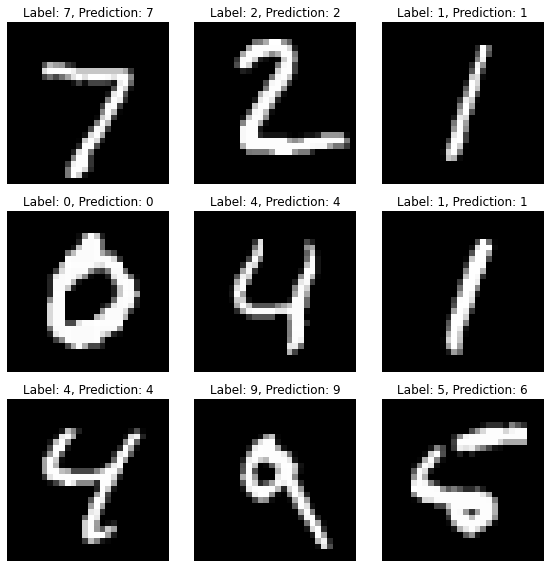

In [13]:
# Train and test the model for the specified number of epochs
for epoch in range(1, num_epochs + 1):
	train(model, device, train_loader, criterion, optimizer, epoch) # Train the model
	test(model, device, test_loader, criterion) # Test the model

# Visualize some sample images and predictions
samples, labels = next(iter(test_loader)) # Get a batch of test data
samples = samples.to(device) # Move the samples to the device
outputs = model(samples) # Get the output logits from the model
_, preds = torch.max(outputs, 1) # Get the predicted classes from the output logits
samples = samples.cpu().numpy() # Move the samples back to CPU and convert to numpy array
fig, axes = plt.subplots(3, 3, figsize=(8, 8)) # Create a 3x3 grid of subplots
for i, ax in enumerate(axes.ravel()):
	ax.imshow(samples[i].squeeze(), cmap='gray') # Plot the image
	ax.set_title(f'Label: {labels[i]}, Prediction: {preds[i]}') # Set the title
	ax.axis('off') # Hide the axes
plt.tight_layout() # Adjust the spacing
plt.show() # Show the plot
